# Python S11 Plotly and Cufflinks

## My Course Notes and Code

These are my notes from the Jose Portilla's Udemy course available [here](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/).

I'm focusing on the section 9 of the course, which deals with **Plotly and Cufflinks**.

**Plotly** is an interactive plotting library for Python. We use **Cufflinks** to connect it with **Pandas**.
____
### Useful links:

https://plotly.com/

https://plotly.com/python/

https://github.com/santosjorge/cufflinks
____
https://dash.gallery/Portal/

https://chart-studio.plotly.com/feed/
____
### [Still Using Tableau? Try Python Plotly For Data Visualization!](https://youtu.be/8d7rArayuzc)

- plotly express
- plotly graph object
- dash

*Plotly/Python is a lot more powerful and flexible than BI software if you don't mind the learning curve.*

*On the other hand, Tableau and PowerBI have built-in authentication/access control, the free version of plotly doesn't have that (have to code your own authentication system). However, there's an enterprise version plotly offers that, plus a wide range of other functionalities that are comparable to Tableau or PowerBI if you don't mind paying.*

In [48]:
import plotly.express as px

df = px.data.gapminder() # https://plotly.com/python-api-reference/generated/plotly.express.data.html
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [49]:
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [50]:
df['country'].nunique()

142

In [51]:
px.line(df.loc[df['country'].isin(['Canada', 'Mexico', 'United States'])],
    x = 'year',
    y = 'lifeExp',
    color = 'country')

In [56]:
px.box(df.loc[df['year'] == 2007],
    y = 'lifeExp',
    color = 'continent',
    hover_name = 'country')

In [57]:
px.violin(df.loc[df['year'] == 2007],
    box = True,
    y = 'lifeExp',
    color = 'continent',
    hover_name = 'country')

In [58]:
px.histogram(df.loc[df['year'] == 2007],
    x = 'lifeExp',
    y = 'gdpPercap',
    histfunc = 'avg',
    color = 'continent')

In [59]:
px.histogram(df.loc[df['year'] == 2007],
    x = 'lifeExp',
    y = 'gdpPercap',
    histfunc = 'avg',
    color = 'continent',
    facet_col = 'continent')

In [60]:
px.scatter(df, x = 'gdpPercap', y = 'lifeExp', color = 'continent', hover_name = 'country')

[Plotly graph animations do not work in jupyter notebook](https://github.com/microsoft/vscode-jupyter/issues/4364)

In [66]:
import plotly.io as pio                         # I got this code from the above-cited link 
pio.renderers.default = 'notebook_connected' 

In [68]:
px.scatter(df, x = 'gdpPercap', y = 'lifeExp', color = 'continent', hover_name = 'country', 
    size = 'pop', 
    log_x = True,
    size_max = 100,
    range_y = [20, 90],
    animation_frame = 'year')

### To do:

Make a similar graph which includes the Gini-coefficient  :)

____
**Instructions and code examples** - source: https://plotly.com/python/getting-started/

For use in the classic Jupyter Notebook, install the notebook and ipywidgets packages using pip:

    pip install "notebook>=5.3" "ipywidgets>=7.5"
or conda:

    conda install "notebook>=5.3" "ipywidgets>=7.5"
These packages contain everything you need to run a Jupyter notebook and display plotly figures inline using the notebook renderer...

In [1]:

fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [2]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])

import plotly.graph_objects as go
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<extra>…

____

### Back to Jose's course

In [19]:
# SET UP

import pandas as pd
%matplotlib inline
import numpy as np
from plotly import __version__
print(__version__)

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

# !pip install cufflinks
import cufflinks as cf
cf.go_offline()

5.6.0


In [17]:
df = pd.DataFrame(np.random.randn(100, 4), columns = 'A B C D'.split())
df.head()

,A,B,C,D
0,-0.190281,-0.807888,-0.280879,0.328889
1,0.328237,-0.644889,-0.004941,-0.053621
2,1.139923,-0.745590,-0.182302,0.694486
3,-1.528541,-1.305028,0.260096,0.022526
4,-0.248870,0.500381,-2.188017,0.136475


In [18]:
df2 = pd.DataFrame({'Category' : ['A', 'B', 'C'], 'Values' : [32, 43, 50]})

#### Line plot

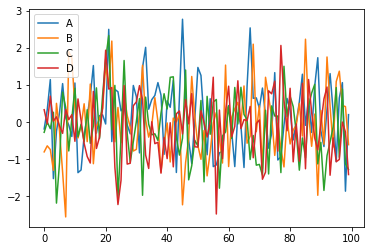

In [20]:
df.plot() # plot made automatically by pandas using matplotlib

In [21]:
df.iplot()

#### Scatterplot

In [23]:
df.iplot(kind = 'scatter', x = 'A', y = 'B', mode = 'markers', size = 20)

#### Bar plot

In [24]:
df2.iplot(kind = 'bar', x = 'Category', y = 'Values')

In [26]:
df.head()

,A,B,C,D
0,-0.190281,-0.807888,-0.280879,0.328889
1,0.328237,-0.644889,-0.004941,-0.053621
2,1.139923,-0.745590,-0.182302,0.694486
3,-1.528541,-1.305028,0.260096,0.022526
4,-0.248870,0.500381,-2.188017,0.136475


In [27]:
df.count().iplot(kind = 'bar')

In [28]:
df.sum().iplot(kind = 'bar')

#### Boxplot

In [29]:
df.iplot(kind = 'box')

#### Surface plot

In [33]:
df3 = pd.DataFrame({
    'x' : [1, 2, 3, 4, 5], 
    'y' : [10, 20, 30, 20, 10], 
    'z' : [500, 400, 300, 200, 100]
    })

df3

,x,y,z
0,1,10,500
1,2,20,400
2,3,30,300
3,4,20,200
4,5,10,100


In [34]:
df3.iplot(kind = 'surface')

In [36]:
df4 = pd.DataFrame({
    'x' : [1, 2, 3, 4, 5], 
    'y' : [10, 20, 30, 20, 10], 
    'z' : [5, 4, 3, 2, 1]
    })

df4.iplot(kind = 'surface', colorscale = 'rdylbu')

#### Histogram

In [38]:
df['A'].iplot(kind = 'hist', bins = 25)

In [39]:
df.iplot(kind = 'hist', bins = 25)

#### Spread

- Useful for stock data :)

In [40]:
df[['A', 'B']].iplot(kind = 'spread')

C:\Users\PC\anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\PC\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



#### Bubble-plot

In [42]:
df.iplot(kind = 'bubble', x = 'A', y = 'B', size = 'C', color = 'orange')

#### Scatter-matrix plot

Use with care on large datasets (*read*: should be avoided altogether)

In [43]:
df.scatter_matrix()